In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.io
import warnings
from bambi import Model

sns.set_context("notebook")
palette = sns.cubehelix_palette(20)
diverge_pal = sns.diverging_palette(220, 10, as_cmap=True)
sns.set_palette(palette)
sns.set(style="ticks",font="Arial",font_scale=2)
warnings.filterwarnings("ignore")

## This notebook loads all fit DTM model outputs and i) generates figures, ii) runs stats where relevant on the output

Methods
---

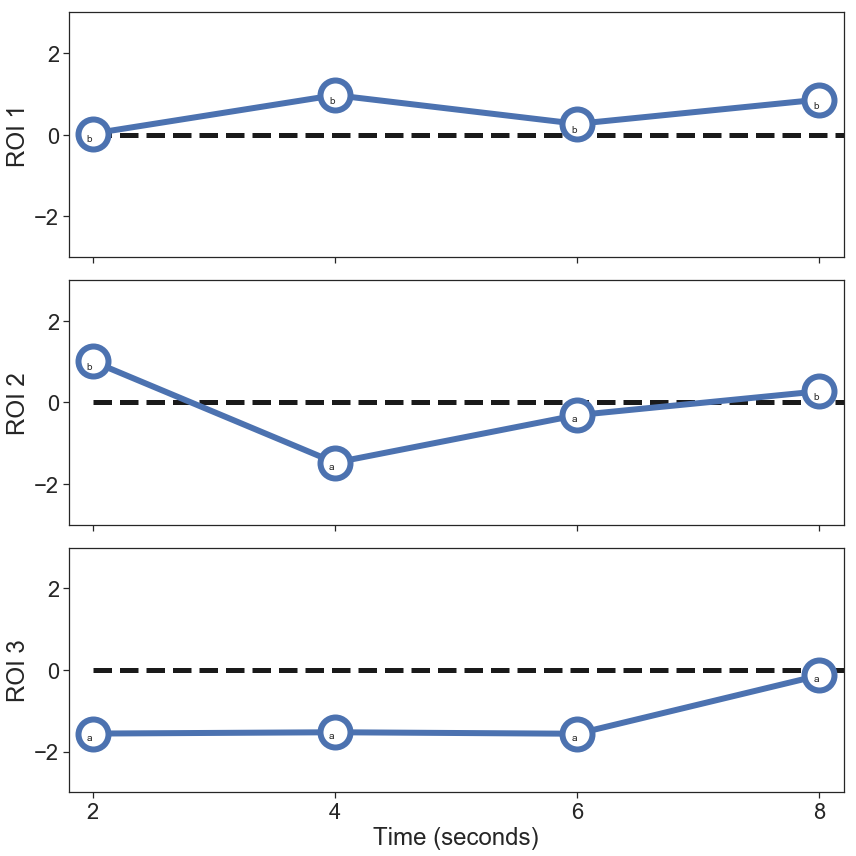

In [2]:
f, axes = plt.subplots(3,1,figsize=(12,12),sharex=True)
for i_ax, ax in enumerate(axes):
    data = np.random.normal(0,1,4)
    ax.plot((0,4),(0,0),"k--",linewidth=5)
    symbols = []
    for i, d in enumerate(data):
        if d < 0:
            ax.text(i-0.025,d-0.15,'a')
        else:
            ax.text(i-0.025,d-0.2,'b')
    ax.plot(range(4),data,marker='o',markersize=30,linewidth=6,markerfacecolor="white",markeredgewidth=6)
    #sns.lineplot(range(4),data,ax=ax,markers=True)
    ax.set_ylim((-3,3))
    ax.set_xlim((-0.1,3.1))
    ax.set_ylabel("ROI %s"%(i_ax+1))
    ax.set_xticks(range(4))
    ax.set_xticklabels([2,4,6,8])
axes[2].set_xlabel("Time (seconds)")
#sns.despine()
plt.tight_layout()
f.savefig("saxfig.pdf")

# Opto-fMRI Validation
---

Load and Prepare Model Fits

In [18]:
original_gammas = np.genfromtxt("gammas_out/opto_gammas.txt")
gammas = np.genfromtxt("model_output/opto/alpha/gammas.csv")
topic_sums = np.genfromtxt("model_output/opto/alpha/topic_sums.csv")
labels = np.genfromtxt("model_output/opto/alpha/labels.csv")
ids = np.genfromtxt("model_output/opto/alpha/ids.csv")
gammas = pd.DataFrame({"Topic 1":gammas[0],"Topic 2":gammas[1],"Stimulation":gammas[2]})
beta1 = scipy.io.loadmat("model_output/opto/beta/topic1_response_matrics.mat")
beta2 = scipy.io.loadmat("model_output/opto/beta/topic2_response_matrics.mat")

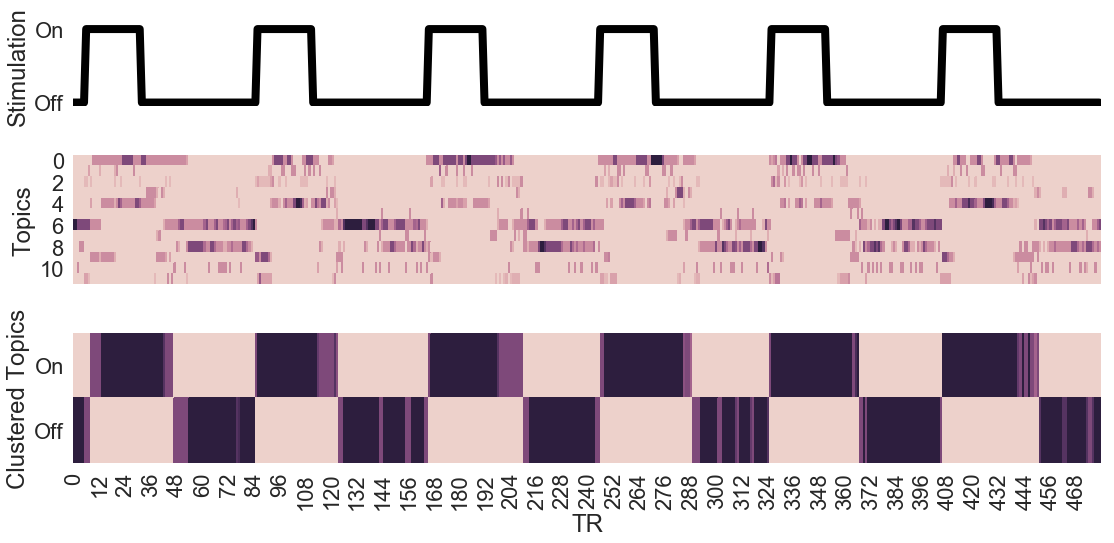

In [20]:
sns.set_style("white")
f, axes = plt.subplots(3,1,figsize=(16,8),gridspec_kw={'height_ratios': [1.25, 2, 2]},sharex=True)

axes[0].plot(gammas["Stimulation"].T,linewidth=8,color="black")
axes[0].set_xlim(0,480)
axes[0].set_yticks(range(1))
axes[0].set_yticklabels(['Off','On'])
axes[0].set_yticks([0,1])
axes[0].set_ylabel("Stimulation")
sns.despine(left=True,bottom=True)

sns.heatmap(original_gammas,ax=axes[1],cmap=palette,cbar=False) #True
axes[1].set_yticklabels([0,2,4,6,8,10],rotation=0)
axes[1].set_ylabel("Topics")

sns.heatmap(gammas[["Topic 2","Topic 1"]].T,ax=axes[2],cmap=palette,cbar=False) #True
axes[2].set_yticklabels(["On", "Off"],rotation=0)
axes[2].set_ylabel("Clustered Topics")
axes[2].set_xlabel("TR")

plt.tight_layout();
f.savefig("paper_figures/Figure2A.pdf")

### 20 topics were fit, 11 had data, 2 clusters were formed (on topic had 3, off topic had 8)

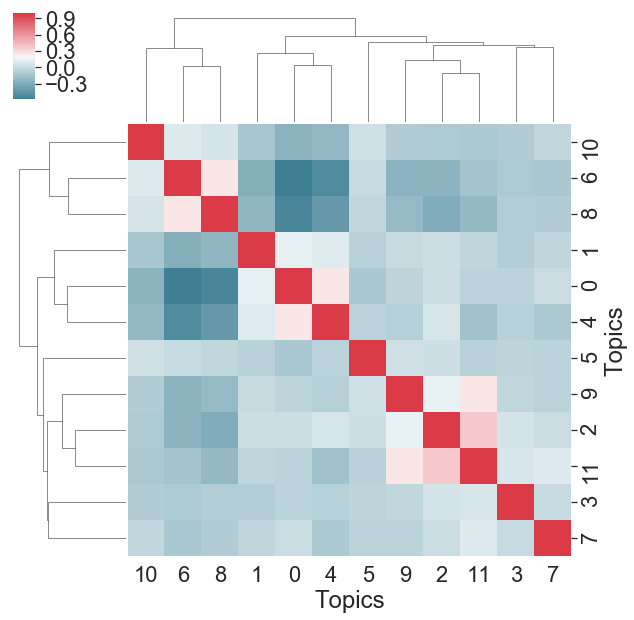

In [28]:
corr_mat = pd.DataFrame(original_gammas).T.corr()
g = sns.clustermap(corr_mat,cmap=diverge_pal)
g.ax_heatmap.set_xlabel("Topics")
g.ax_heatmap.set_ylabel("Topics");
g.savefig("paper_figures/Figure2B.pdf")

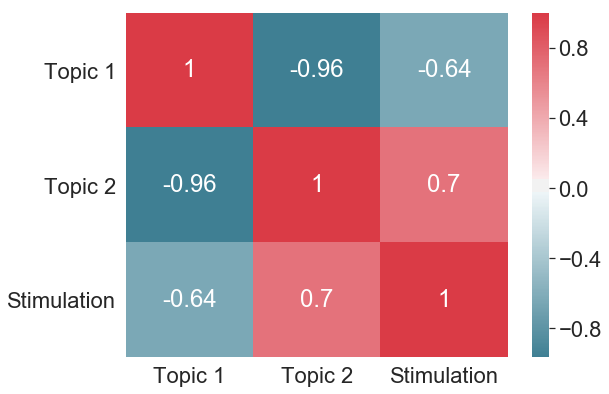

In [22]:
f, ax = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(gammas.corr(),cmap=diverge_pal,annot=True)
ax.set_yticklabels(gammas.columns,rotation=0)
plt.tight_layout();
f.savefig("paper_figures/Figure2C.pdf")

In [40]:
# f, ax = plt.subplots(1,1,figsize=(9,6))
# sns.heatmap(np.round(beta2['active'],2),cmap=palette,vmin=0,vmax=0.2,linewidths=0.5,annot=True)
# ax.set_yticklabels(gammas.columns,rotation=0)
# plt.tight_layout();
# f.savefig("paper_figures/Figure2D_colorbar.pdf")

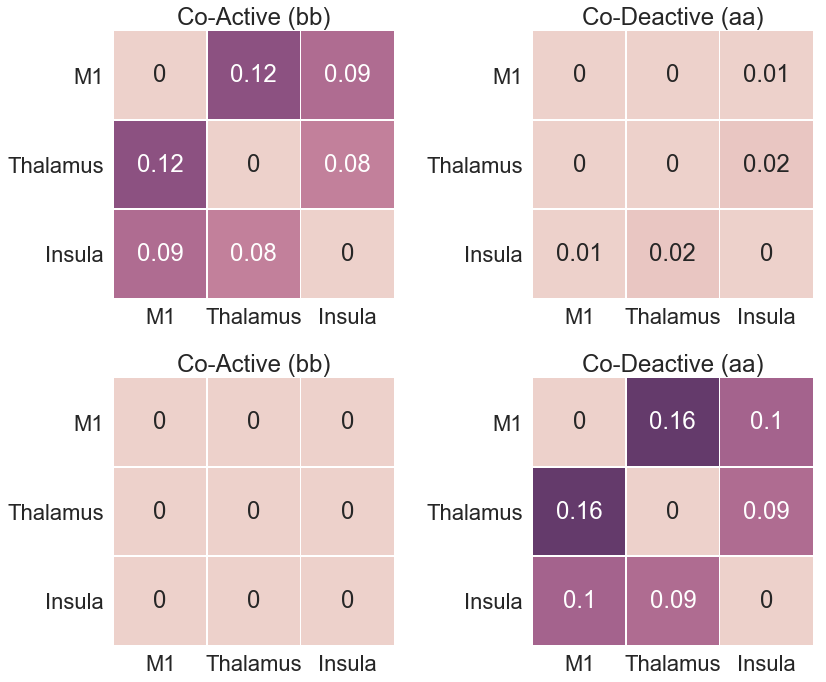

In [36]:
f, axes = plt.subplots(2,2,figsize=(12,10))
sns.heatmap(np.round(beta2['active'],2),cmap=palette,ax=axes[0,0],vmin=0,vmax=0.2,cbar=False,linewidths=0.5,annot=True)
axes[0,0].set_title("Co-Active (bb)")
sns.heatmap(np.round(beta2['deactive'],2),cmap=palette,ax=axes[0,1],vmin=0,vmax=0.2,cbar=False,linewidths=0.5,annot=True)
axes[0,1].set_title("Co-Deactive (aa)")
sns.heatmap(np.round(beta1['active'],2),cmap=palette,ax=axes[1,0],vmin=0,vmax=0.2,cbar=False,linewidths=0.5,annot=True)
axes[1,0].set_title("Co-Active (bb)")
sns.heatmap(np.round(beta1['deactive'],2),cmap=palette,ax=axes[1,1],vmin=0,vmax=0.2,cbar=False,linewidths=0.5,annot=True)
axes[1,1].set_title("Co-Deactive (aa)")
for i in range(2):
    for j in range(2):
        axes[i,j].set_xticklabels(['M1','Thalamus','Insula'])
        axes[i,j].set_yticklabels(['M1','Thalamus','Insula'],rotation=0)
plt.tight_layout();
f.savefig("paper_figures/Figure2D.pdf")

# Math Learning
---

In [41]:
task_names = ["math1","math2"]
original_gammas, gammas, topic_sums, labels, ids, beta1, beta2 = [],[],[],[],[],[],[]
for i, task in enumerate(task_names):
    original_gammas.append(np.genfromtxt("gammas_out/%s_gammas.txt"%task))
    gammas.append(np.load("model_output/%s/alpha/indiv_gammas.npy"%task))
    topic_sums.append(np.genfromtxt("model_output/%s/alpha/topic_sums.csv"%task))
    labels.append(np.genfromtxt("model_output/%s/alpha/labels.csv"%task))
    ids.append(np.genfromtxt("model_output/%s/alpha/ids.csv"%task))
    beta1.append(scipy.io.loadmat("model_output/%s/beta/topic1_response_matrics.mat"%task))
    beta2.append(scipy.io.loadmat("model_output/%s/beta/topic2_response_matrics.mat"%task))

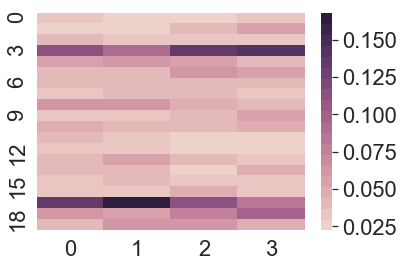

In [42]:
sns.heatmap(original_gammas[0],cmap=palette);

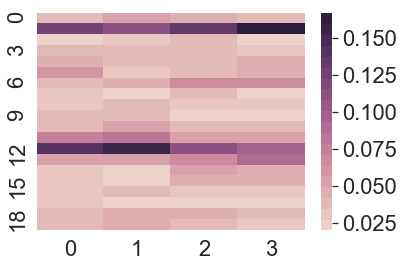

In [43]:
sns.heatmap(original_gammas[1],cmap=palette);

In [44]:
data = {'probability':[],'Topic':[],'TR':[],'timepoint':[]}
for tr in range(4):
    for state in range(2):
        for time in range(2):
            nTrials = np.shape(gammas[time])[0]
            for prob in range(nTrials):
                data['probability'].append(gammas[time][prob,state,tr])
                data['TR'].append(tr)
                if time == 0 and state == 0:
                    data['timepoint'].append('pre')
                    data['Topic'].append('1')
                elif time == 0 and state == 1:
                    data['timepoint'].append('pre')
                    data['Topic'].append('2')
                elif time == 1 and state == 0:
                    data['timepoint'].append('post')
                    data['Topic'].append('1')
                elif time == 1 and state == 1:
                    data['timepoint'].append('post')
                    data['Topic'].append('2')
df = pd.DataFrame.from_dict(data)

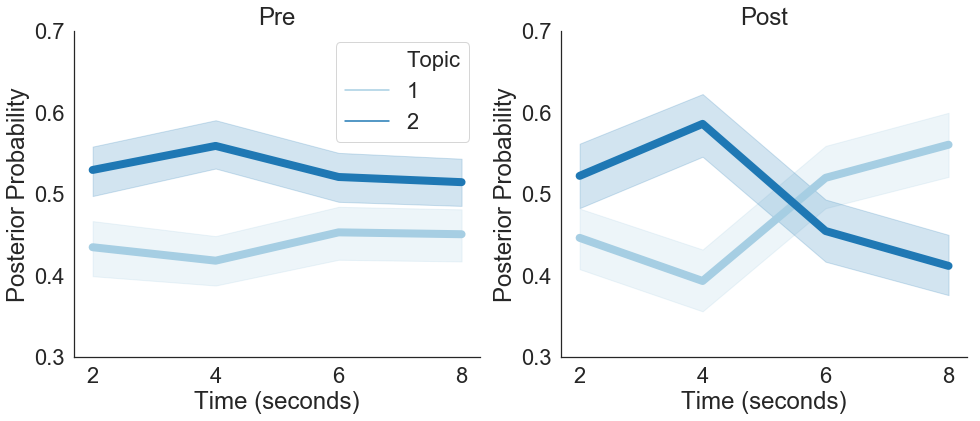

In [71]:
f, axes = plt.subplots(1,2,figsize=(16,6))
sns.lineplot(x="TR",y="probability",hue="Topic",data=df[df["timepoint"] == "pre"],ax=axes[0],
             palette=[sns.color_palette("Paired")[0],sns.color_palette("Paired")[1]],linewidth=8)
sns.lineplot(x="TR",y="probability",hue="Topic",data=df[df["timepoint"] == "post"],ax=axes[1],
             palette=[sns.color_palette("Paired")[0],sns.color_palette("Paired")[1]],linewidth=8)
titles = ["Pre","Post"]
for i, ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.set_ylim([0.3,0.7])
    ax.set_ylabel("Posterior Probability")
    ax.set_xticklabels([0,2,4,6,8])
    ax.set_xlabel("Time (seconds)")
axes[1].legend_.remove()
sns.despine()
#plt.tight_layout();
f.savefig("paper_figures/Figure3B.pdf")

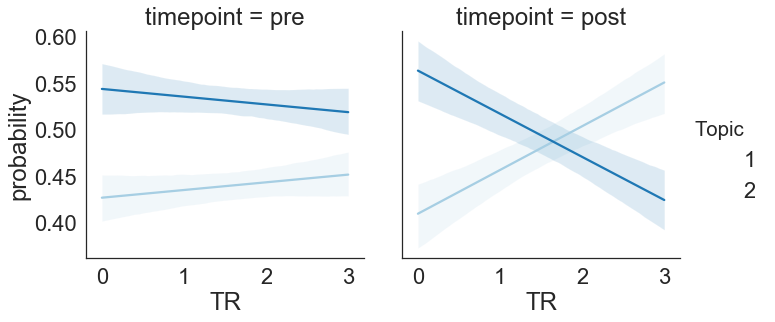

In [46]:
sns.lmplot(x="TR",y="probability",hue="Topic",data=df,col="timepoint",palette=sns.color_palette("Paired"),
           markers="",col_order=["pre","post"],truncate=True)

In [562]:
model = Model(df, dropna=True)

fit = model.fit("probability ~ TR*Topic*timepoint",samples=2000, chains=4, target_accept=0.99, tune=1000)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5193: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
INFO (theano.gof.compilelock): Refreshing lock /Users/jonathan/.theano/compiledir_Darwin-17.3.0-x86_64-i386-64bit-i386-3.7.0-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /Users/jonathan/.theano/compiledir_Darwin-17.3

/usr/local/lib/python3.7/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/usr/local/lib/python3.7/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False
/usr/local/lib/python3.7/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/usr/local/lib/python3.7/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False
/usr/local/l

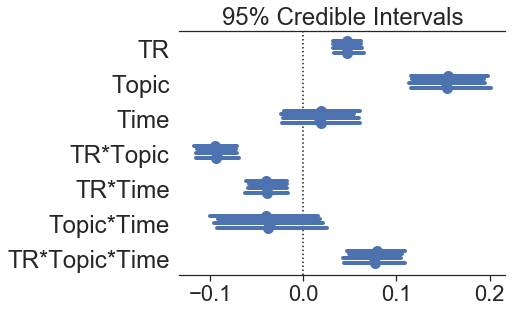

In [566]:
import pymc3 as pm
pm.forestplot(model.backend.trace, rhat=False, quartiles=False, plot_kwargs={"markersize":10,"linewidth":8},
                  ylabels=[ "TR",'Topic', 'Time','TR*Topic','TR*Time','Topic*Time','TR*Topic*Time'],
                  varnames=['TR','Topic','timepoint','TR:Topic','TR:timepoint','Topic:timepoint','TR:Topic:timepoint']);

In [586]:
predictors = ['TR','Topic','timepoint','TR:Topic',
              'TR:timepoint','Topic:timepoint','TR:Topic:timepoint']
for var in predictors:
    hpd = pm.stats.hpd(model.backend.trace[var])
    mean = np.mean(model.backend.trace[var])
    print(var,mean,hpd)

TR 0.047111980868220854 [[0.03153722 0.06236546]]
Topic 0.15441299087765498 [[0.11299237 0.195267  ]]
timepoint 0.01779445018666543 [[-0.02343797  0.05785381]]
TR:Topic -0.09355552835727325 [[-0.11651149 -0.07195715]]
TR:timepoint -0.038881742908264315 [[-0.05972598 -0.01657492]]
Topic:timepoint -0.037839317939960065 [[-0.09621186  0.02008176]]
TR:Topic:timepoint 0.07702715418742603 [[0.04614142 0.10823066]]


In [594]:
print("Pre cluster one size: %s"%np.count_nonzero(labels[0] == 1))
print("Pre cluster two size: %s"%np.count_nonzero(labels[0] == 2))
print("Post cluster one size: %s"%np.count_nonzero(labels[1] == 1))
print("Post cluster two size: %s"%np.count_nonzero(labels[1] == 2))

Pre cluster one size: 8
Pre cluster two size: 11
Post cluster one size: 9
Post cluster two size: 10


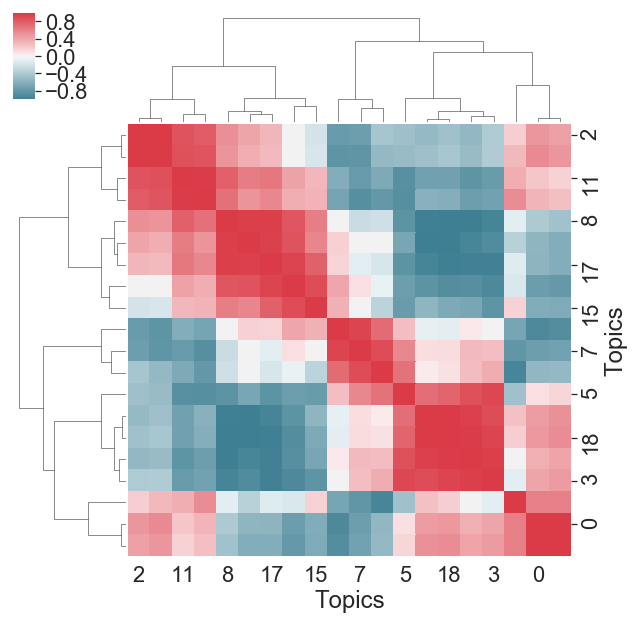

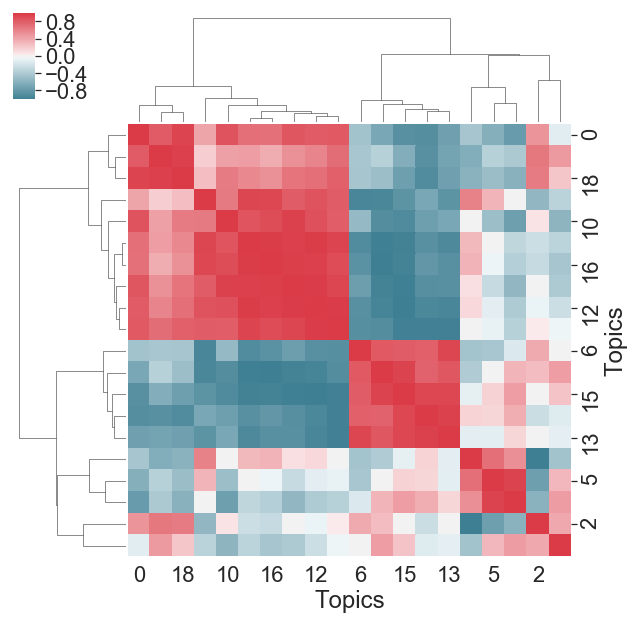

In [72]:
corr_mat1 = pd.DataFrame(original_gammas[0]).T.corr()
g = sns.clustermap(corr_mat1,cmap=diverge_pal)
g.ax_heatmap.set_xlabel("Topics")
g.ax_heatmap.set_ylabel("Topics")
g.savefig("paper_figures/Figure3A_pre.pdf")

corr_mat2 = pd.DataFrame(original_gammas[1]).T.corr()
g = sns.clustermap(corr_mat2,cmap=diverge_pal)
g.ax_heatmap.set_xlabel("Topics")
g.ax_heatmap.set_ylabel("Topics")
g.savefig("paper_figures/Figure3A_post.pdf")

In [694]:
import scipy
l1 = scipy.cluster.hierarchy.average(corr_mat1)
l2 = scipy.cluster.hierarchy.average(corr_mat2)

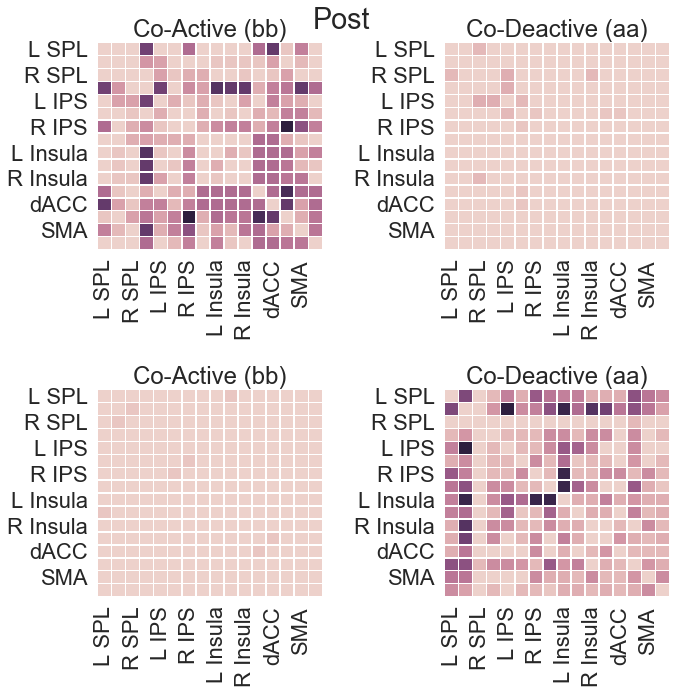

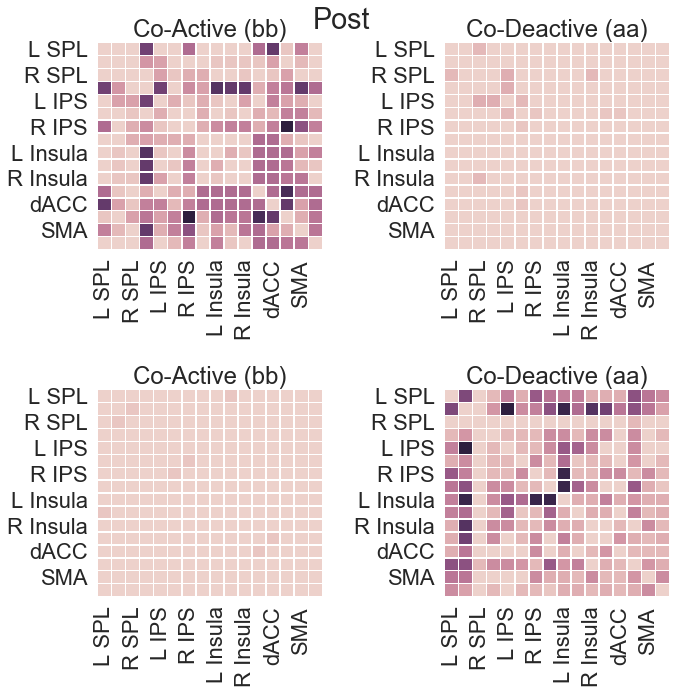

In [81]:
rois = ['L SPL', 'R SPL', 'L IPS', 'R IPS', 'L Insula', 'R Insula',
        'dACC', 'SMA', 'L MFG', 'R MFG', 'R VLPFC', 'L VLPFC',
        'R FG', 'L FG', 'R Hipp', 'L Hipp']
timepoints = ["Pre","Post"]
for i in range(len(beta2)):
    i = 1
    f, axes = plt.subplots(2,2,figsize=(10,10))
    f.suptitle(timepoints[i])
    sns.heatmap(beta1[i]['active'],cmap=palette,ax=axes[0,0],vmin=0,vmax=0.01,cbar=False,linewidths=0.5)
    axes[0,0].set_title("Co-Active (bb)")
    sns.heatmap(beta1[i]['deactive'],cmap=palette,ax=axes[0,1],vmin=0,vmax=0.01,cbar=False,linewidths=0.5)
    axes[0,1].set_title("Co-Deactive (aa)")
    sns.heatmap(beta2[i]['active'],cmap=palette,ax=axes[1,0],vmin=0,vmax=0.01,cbar=False,linewidths=0.5)
    axes[1,0].set_title("Co-Active (bb)")
    sns.heatmap(beta2[i]['deactive'],cmap=palette,ax=axes[1,1],vmin=0,vmax=0.01,cbar=False,linewidths=0.5)
    axes[1,1].set_title("Co-Deactive (aa)")
    for i in range(2):
        for j in range(2):
            axes[i,j].set_xticklabels(rois,rotation=90)
            axes[i,j].set_yticklabels(rois,rotation=0)
    plt.tight_layout();
    f.savefig("paper_figures/Figure3C_%s.pdf"%timepoints[i])

## Supplemental Figure 1
---
- Control analyses comparing dtm and bsds on the opto dataset

In [ ]:
bsds_states = "opto_bsds_states.csv"
dtm_states = "grp_gammas_opto.csv"

dtm_states = pd.read_csv(dtm_states)
bsds_states = pd.read_csv(bsds_states,header=None)

stimulation = 1 - dtm_states["Stimulation"]

bsds_states = bsds_states == 10
dtm_states = dtm_states["Topic 1"] > 0.5

comp_df = {"Model":[],"Performance":[]}
comp_df["Model"].append("DTM")
comp_df["Performance"].append((dtm_states == stimulation).mean())

comp_df["Model"].append("BSDS")
comp_df["Performance"].append((bsds_states[0] == stimulation).mean())
comp_df["Model"].append("BSDS")
comp_df["Performance"].append((bsds_states[1] == stimulation).mean())
comp_df["Model"].append("BSDS")
comp_df["Performance"].append((bsds_states[2] == stimulation).mean())

comp_df = pd.DataFrame.from_dict(comp_df)

f, ax = plt.subplots(1,1,figsize=(4.25,6))
sns.stripplot(x="Model",y="Performance",data=comp_df[comp_df.Model == "BSDS"],ax=ax,size=13,jitter=0.15,color="black",alpha=0.6)
sns.barplot(x="Model",y="Performance",data=comp_df,order=["BSDS","DTM"],color="black",ax=ax,ci=None, alpha=0.4)

ax.plot((-0.75,1.75),(0.5,0.5),'k--', linewidth=1)
ax.set_ylim([0,1])
ax.set_xlim((-0.65,1.65))
ax.set_xticklabels(["BSDS", "DTM"],fontsize=24)
ax.set_xlabel("Model",fontsize=30)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_yticklabels([0, 25, 50, 75, 100],fontsize=24)
ax.set_ylabel("% Correctly Labeled TR",fontsize=30)

sns.despine()
plt.tight_layout()
plt.savefig("paper_figures/SuppFig1.pdf")


In [715]:
def merged_order(labels,ids):
    '''
        Returns ordered list of topics in the order they were merged in
        Useful for plotting and re-ordering
    '''
    labels = np.unique(labels)
    mat_order = []
    for l in labels:
        grp_ts = []
        for t in range(len(labels)):
            if labels[t] == l:
                grp_ts.append(ids[t])
        mat_order.append(grp_ts)
    return mat_order